In [10]:
## Imports

In [11]:
#Python Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#Importing CSV for bus lane fines
df = pd.read_csv('BusLaneFineData.csv')

#Limiting current printed rows
result = df.head(20)

print(result) #Test print


           PCN      ISSUED                                   LOCATION  \
0   LS84569740  01/07/2020   BUS LANE, YORK ROAD JUNC SKELTON TERRACE   
1   LS84569740  01/07/2020   BUS LANE, YORK ROAD JUNC SKELTON TERRACE   
2   LS84569820  01/07/2020            BUS LANE, OTLEY ROAD HEADINGLEY   
3   LS84569831  01/07/2020            BUS LANE, OTLEY ROAD HEADINGLEY   
4   LS84569831  01/07/2020            BUS LANE, OTLEY ROAD HEADINGLEY   
5   LS84569911  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
6   LS84569922  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
7   LS84569922  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
8   LS84569922  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
9   LS84569933  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
10  LS84569944  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
11  LS84569955  01/07/2020  BUS LANE, ROUNDHAY RD JUNC SHEPHERDS LANE   
12  LS84570353  01/07/2020       BUS LANE, ELLAND R

In [13]:
##Data Cleaning

In [14]:
print(df.isnull().sum()) #This method shows what columns have empty values and how many

PCN           0
ISSUED        0
LOCATION      0
Unnamed: 3    0
FINE          0
Total Paid    0
Balance       0
dtype: int64


In [15]:
print(df.isnull().any())

PCN           False
ISSUED        False
LOCATION      False
Unnamed: 3    False
FINE          False
Total Paid    False
Balance       False
dtype: bool


In [16]:
list(df.columns.values)

['PCN', 'ISSUED', 'LOCATION', 'Unnamed: 3', 'FINE', 'Total Paid', 'Balance']

In [17]:
#A Column does not have a header name - lets fix this

df.columns.values[3] = 'Full Fine After 30 days'
df.head(3000) #Print to check



,PCN,ISSUED,LOCATION,Full Fine After 30 days,FINE,Total Paid,Balance
0,LS84569740,01/07/2020,"BUS LANE, YORK ROAD JUNC SKELTON TERRACE",60,01/07/2020,30,0
1,LS84569740,01/07/2020,"BUS LANE, YORK ROAD JUNC SKELTON TERRACE",60,17/07/2020,30,0
2,LS84569820,01/07/2020,"BUS LANE, OTLEY ROAD HEADINGLEY",60,01/07/2020,30,0
3,LS84569831,01/07/2020,"BUS LANE, OTLEY ROAD HEADINGLEY",60,01/07/2020,30,0
4,LS84569831,01/07/2020,"BUS LANE, OTLEY ROAD HEADINGLEY",60,17/07/2020,30,0
...,...,...,...,...,...,...,...
2995,LS84587378,13/07/2020,"BUS LANE, YORK ROAD JUNC SKELTON TERRACE",60,04/08/2020,30,0
2996,LS84587389,13/07/2020,"BUS LANE, YORK ROAD JUNC SKELTON TERRACE",60,13/07/2020,30,0
2997,LS8458739A,13/07/2020,"BUS LANE, YORK ROAD JUNC SKELTON TERRACE",60,05/08/2020,30,0
2998,LS84587425,13/07/2020,"BUS LANE, OTLEY ROAD HEADINGLEY",60,13/07/2020,0,0


In [18]:
## Data Visualisation

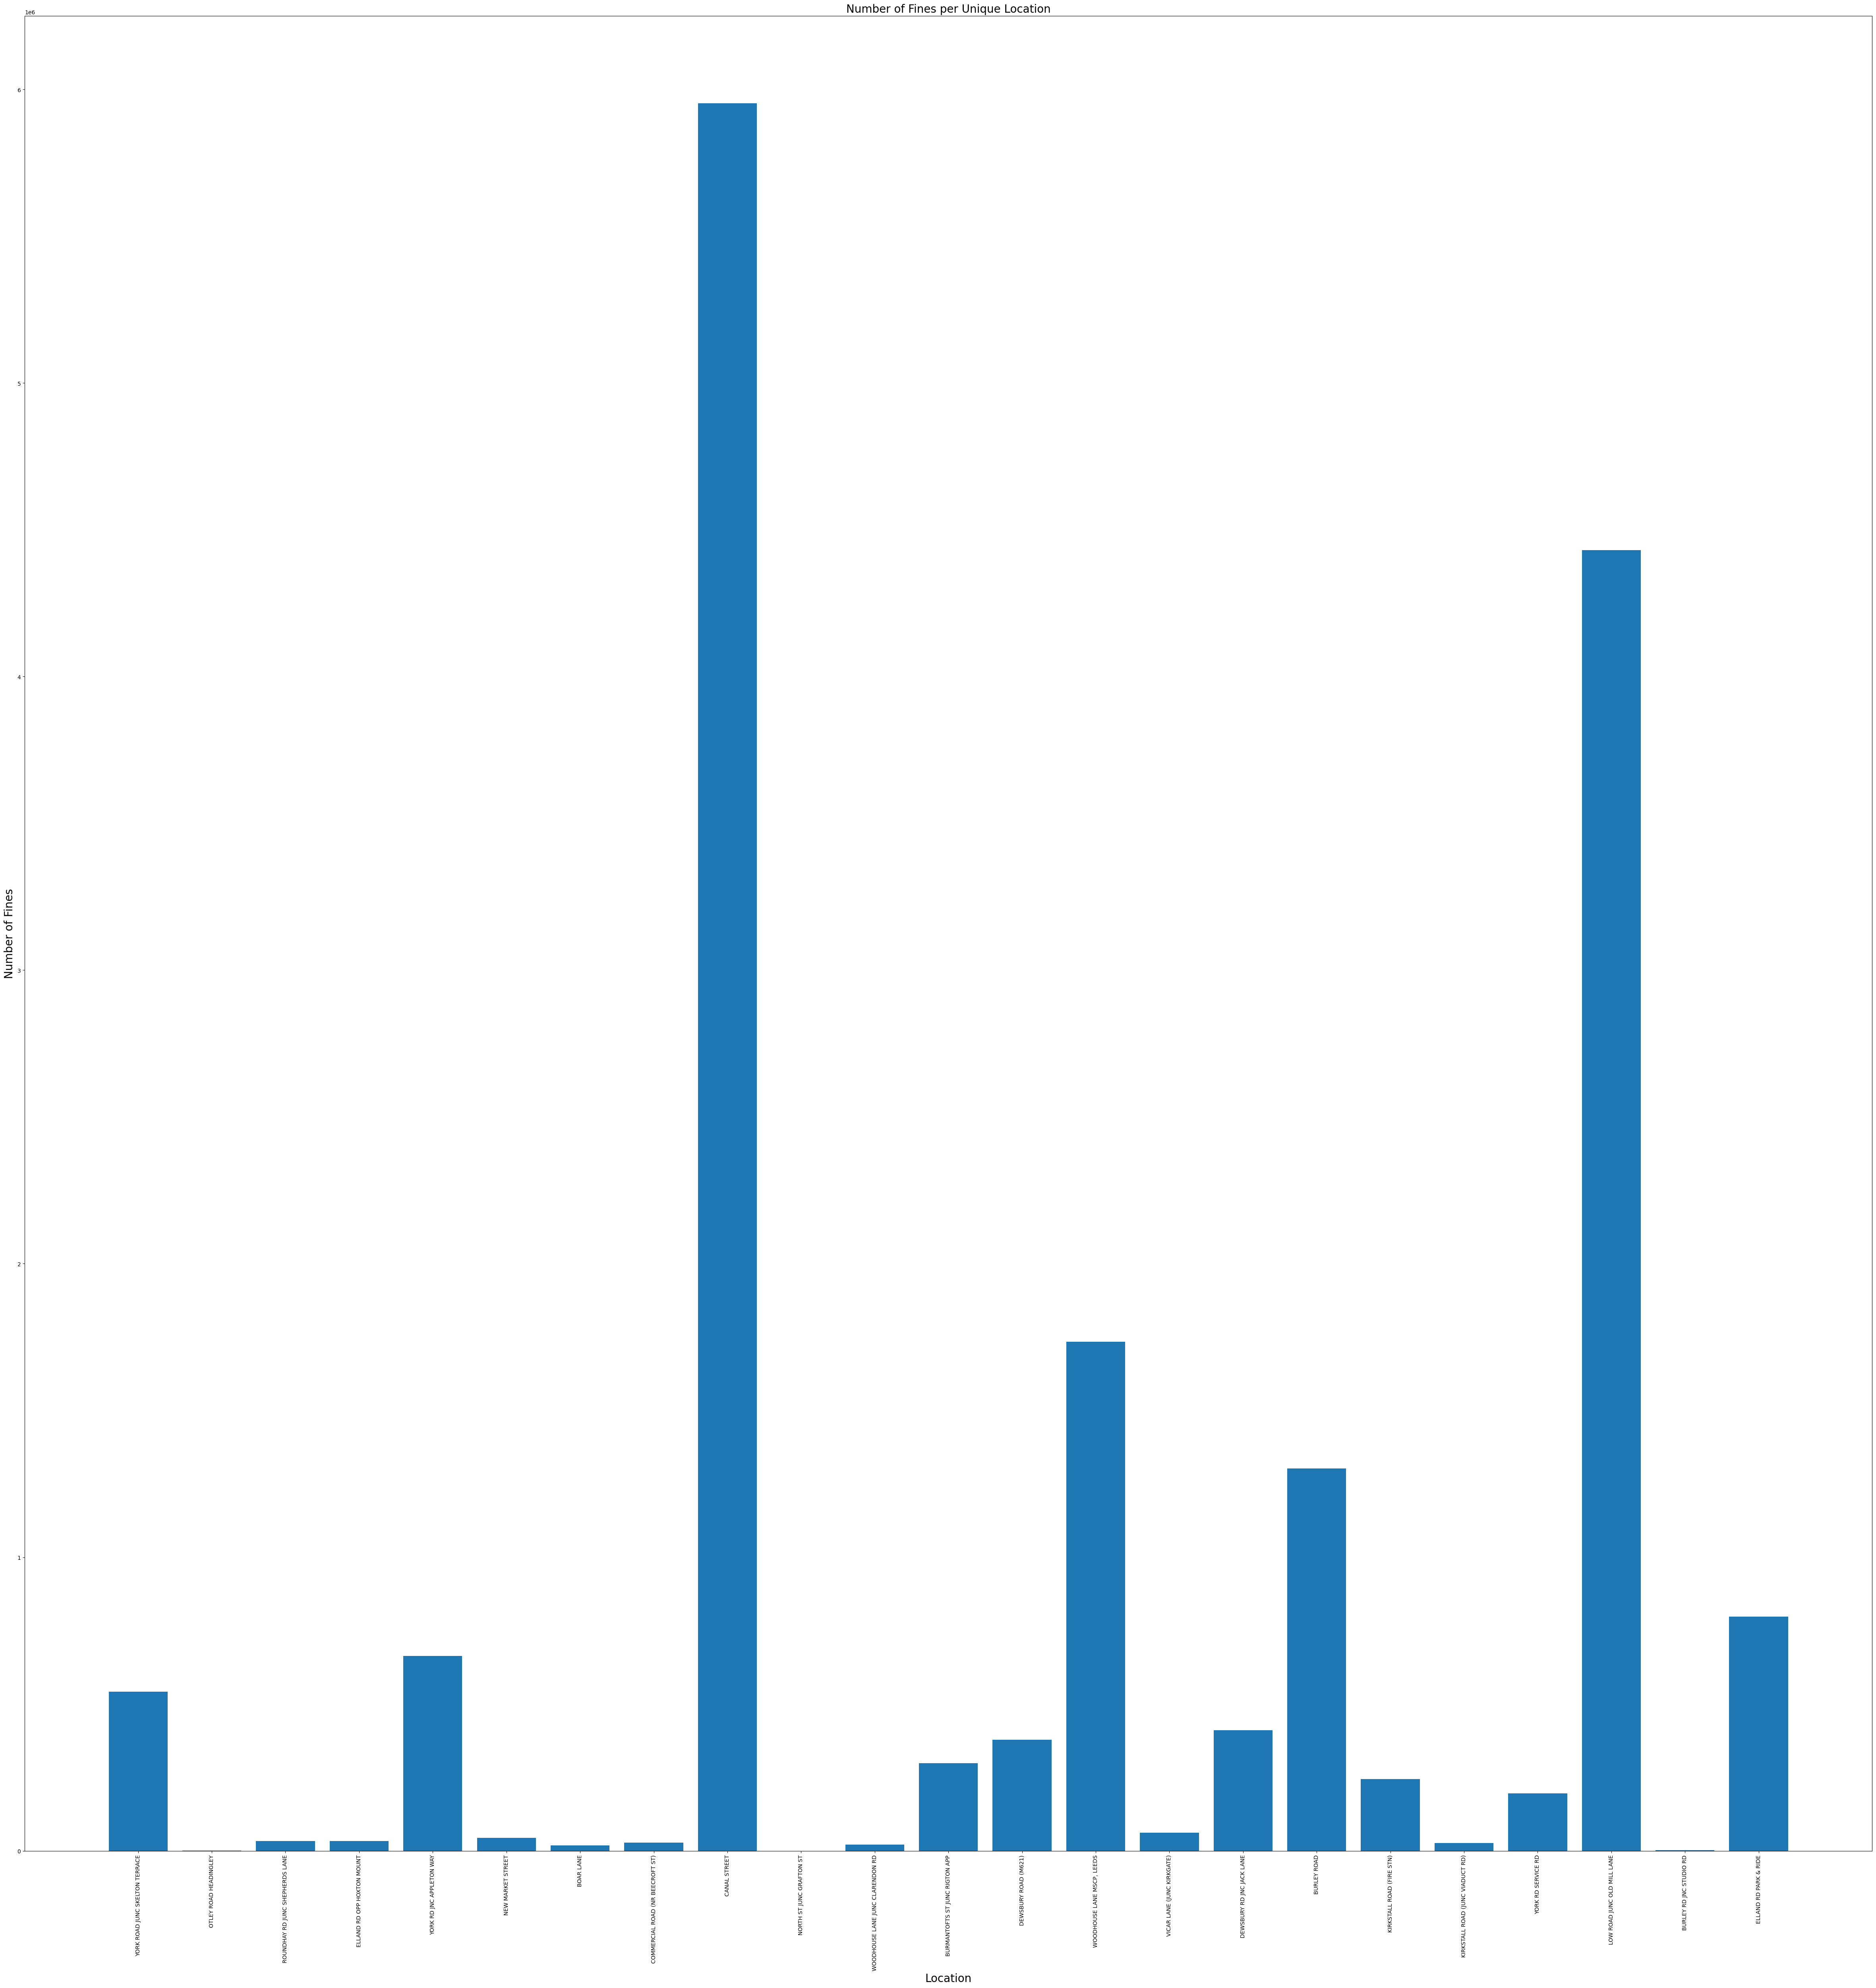

In [19]:
#In this cell, we are visualising the locations and how many fines were at that location

#x-axis we are manually adding unique names from the dataset
x = np.array(["YORK ROAD JUNC SKELTON TERRACE", "OTLEY ROAD HEADINGLEY", "ROUNDHAY RD JUNC SHEPHERDS LANE", "ELLAND RD OPP HOXTON MOUNT","YORK RD JNC APPLETON WAY","NEW MARKET STREET","BOAR LANE","COMMERCIAL ROAD (NR BEECROFT ST)","CANAL STREET","NORTH ST JUNC GRAFTON ST","WOODHOUSE LANE JUNC CLARENDON RD","BURMANTOFTS ST JUNC RIGTON APP","DEWSBURY ROAD (M621)","WOODHOUSE LANE MSCP, LEEDS","VICAR LANE (JUNC KIRKGATE)","DEWSBURY RD JNC JACK LANE","BURLEY ROAD","KIRKSTALL ROAD (FIRE STN)","KIRKSTALL ROAD (JUNC VIADUCT RD)","YORK RD SERVICE RD","LOW ROAD JUNC OLD MILL LANE","BURLEY RD JNC STUDIO RD","ELLAND RD PARK & RIDE"])

#y-axis we are going to create a temporary column to count the ammount of fines per location
df['Fine Count'] = df.groupby('LOCATION')['LOCATION'].transform('count')
FineAmmount = df.groupby('LOCATION')['Fine Count'].sum().reset_index()

#Data plotting - there is a huge ammount of datapoints to display
plt.subplots(figsize=(60,60))
plt.xlabel('Location', fontsize=20) 
plt.xticks(rotation=90)
plt.ylabel('Number of Fines',fontsize=20)
plt.title('Number of Fines per Unique Location',fontsize=20)
plt.bar(x, FineAmmount['Fine Count'])
plt.show()

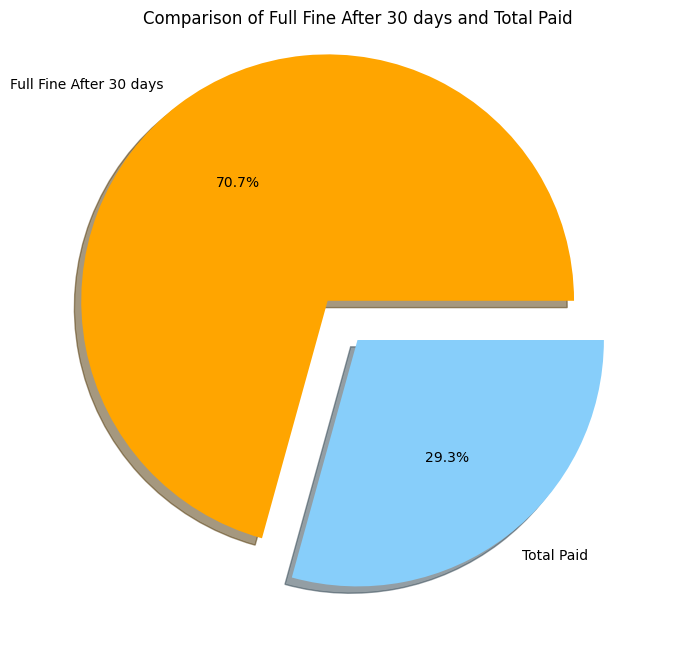

In [20]:
#In this cell, we are visualising total fines vs ammoung paid
PieDataTotalFullFine = df['Full Fine After 30 days'].sum() #Calcultaing the sum of full fine after 30 days
PieDataTotalPaid = df['Total Paid'].sum() #Calculating how much was actually paid

labels = ['Full Fine After 30 days', 'Total Paid']
sizes = [PieDataTotalFullFine, PieDataTotalPaid] #Datapoints
colors = ['orange', 'lightskyblue']
explode = (0.2, 0)  #Splits the pie slices up slightly for visual enhancement

# Plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True)
plt.title('Comparison of Full Fine After 30 days and Total Paid')

plt.show()

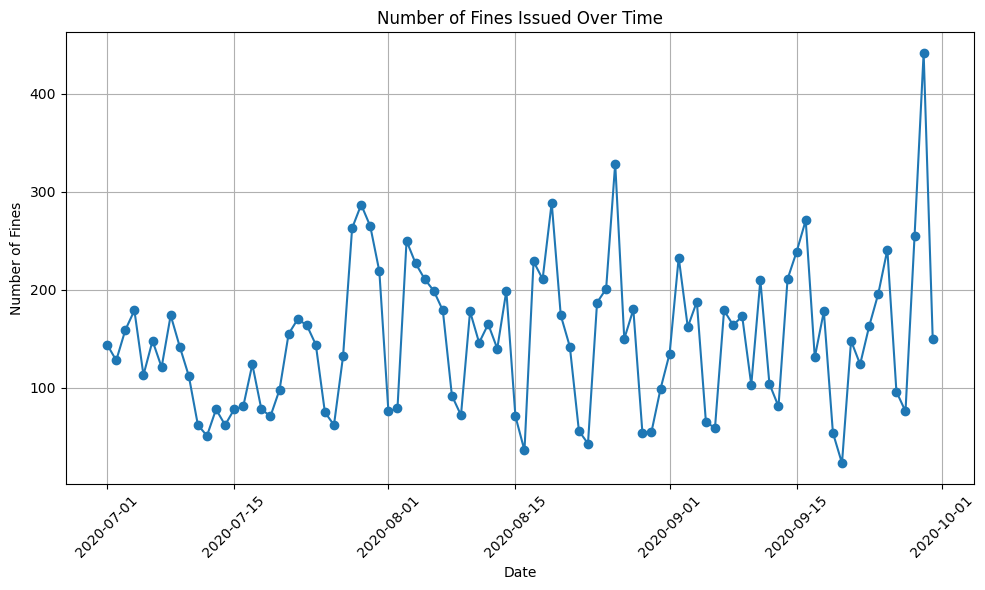

In [41]:
#In this cell, we are visualising dates and ammounts of fines on those dates via a line graph


#Creating a temporary column of a count of PCN Issues
df['PCNCount'] = df.groupby('PCN')['PCN'].transform('count')
PCNAmmount = df.groupby('PCN')['PCNCount'].sum().reset_index()

#Ensuring Fine columns if correctly formatted as a date
df['FINE'] = pd.to_datetime(df['FINE'], format='%d/%m/%Y')

date_fine_counts = df['FINE'].value_counts().sort_index().reset_index()
date_fine_counts.columns = ['Date', 'FineCount']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(date_fine_counts['Date'], date_fine_counts['FineCount'], marker='o')

plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Fines')
plt.title('Number of Fines Issued Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
print(df.columns)

Index(['PCN', 'FINE', 'PCNCount'], dtype='object')


In [45]:
#Going to print the ammount of fines issues
TotalPCNCharges = df['PCN'].sum()
print(f"Ammount of PCN Charges : {TotalPCNCharges}")

Ammount of PCN Charges : 32212
